<h2 align=center> Facial Expression Recognition</h2>

## Importing Libraries

In [1]:
!pip install utils
!pip install livelossplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.2.0


## Getting total number of images of each category

In [2]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'drowsiness_detection.py',
 'email_notification.py',
 'facial-expression-recognization-using-tensorflow-256.ipynb',
 'facial-expression-recognization-using-tensorflow.ipynb',
 'facial_expression_model.py',
 'final_project',
 'haarcascade_frontalface_default.xml',
 'model.json',
 'model.png',
 'model_weights.h5',
 'playground',
 'README.md',
 'requirements.txt',
 'test',
 'train',
 'Untitled.ipynb']

In [4]:
path = "train/train/"
for expression in os.listdir(path):
    print(str(len(os.listdir(path + expression))) + " " + expression + " images")

1441 alert images
1435 tired images


In [5]:
path = "test/test/"
for expression in os.listdir(path):
    print(str(len(os.listdir(path + expression))) + " " + expression + " images")

361 alert images
359 tired images


## Generate Training and Validation Batches

In [6]:
img_size = 256
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(path,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 720 images belonging to 2 classes.
Found 720 images belonging to 2 classes.


## Create CNN Model

In [7]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(img_size, img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     5

## Visualize Model Architecture

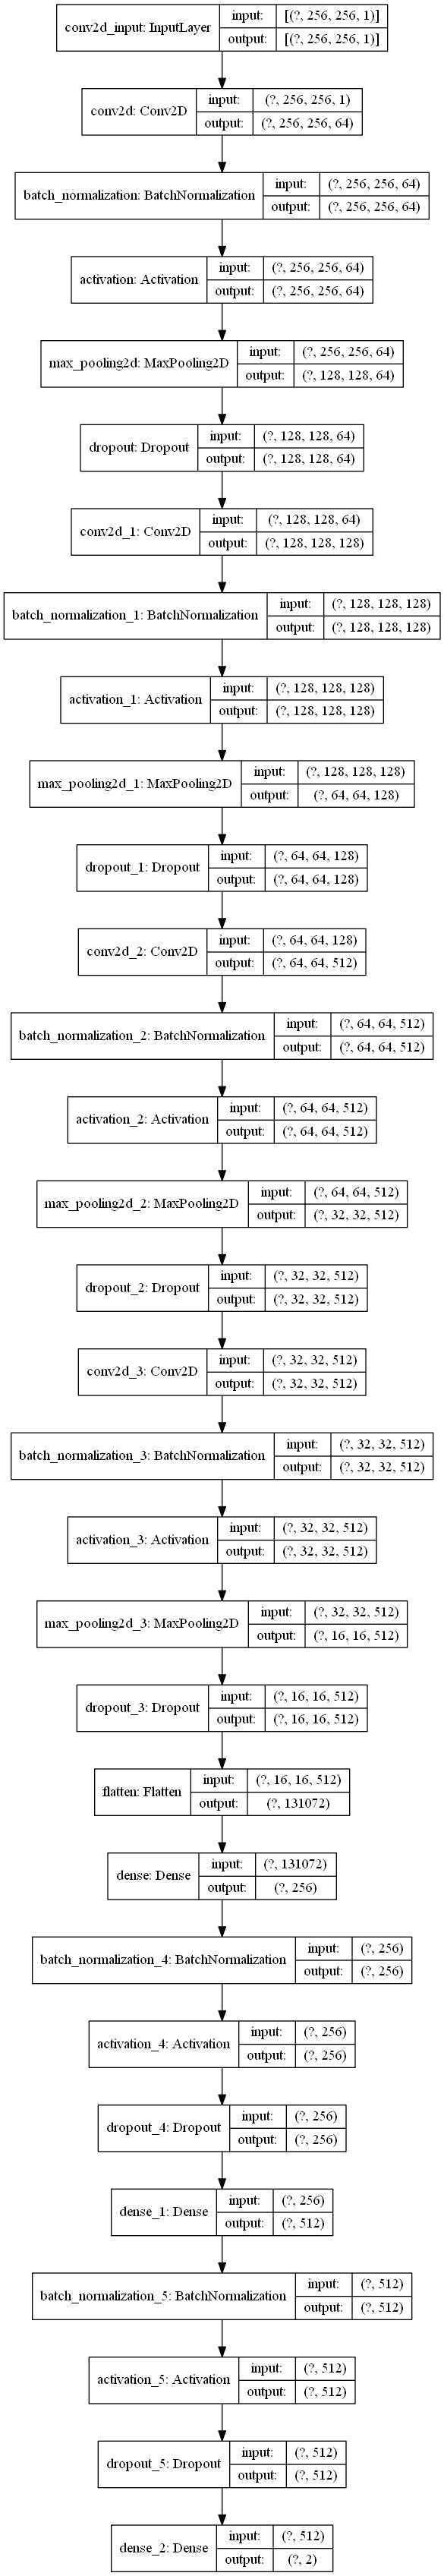

In [8]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

## Training and Evaluating Model

In [9]:

%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps
)

Epoch 1/15
11/11 [==============================] - 206s 19s/step - loss: 0.1742 - accuracy: 0.9162 - val_loss: 2.0622 - val_accuracy: 0.8366
Epoch 2/15
11/11 [==============================] - 207s 19s/step - loss: 0.0299 - accuracy: 0.9924 - val_loss: 4.1166 - val_accuracy: 0.7159
Epoch 3/15
11/11 [==============================] - 204s 19s/step - loss: 0.0140 - accuracy: 0.9985 - val_loss: 9.9437 - val_accuracy: 0.5185
Epoch 4/15
11/11 [==============================] - 211s 19s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 2.7871 - val_accuracy: 0.6463
Epoch 5/15
11/11 [==============================] - 221s 20s/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.1692 - val_accuracy: 0.9403
Epoch 6/15
11/11 [==============================] - 225s 20s/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.2740 - val_accuracy: 0.9219
Epoch 7/15
11/11 [==============================] - 222s 20s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3825 - val_accuracy: 0.9048
Epoch 

## Represent Model as JSON String

In [10]:
model_json = model.to_json()
model.save_weights('model_weights.h5')
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Class for loading model and weights

In [32]:
from tensorflow.keras.models import model_from_json
import numpy as np

import tensorflow as tf


class FacialExpressionModel(object):

    EMOTIONS_LIST = ["Neutral","Tired"]

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()

    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]


## Getting frames and doing prediction

In [33]:
  
import cv2
import numpy as np

facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("./model.json", "./model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX

class VideoCamera(object):
    def __init__(self):
        self.video = cv2.VideoCapture(0)

    def __del__(self):
        self.video.release()

    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)

        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]

            roi = cv2.resize(fc, (48, 48))
            pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
 
            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)

        return fr

ModuleNotFoundError: No module named 'cv2'

## Function for showing output video

In [ ]:
def gen(camera):
    while True:
        frame = camera.get_frame()
        cv2.imshow('Facial Expression Recognization',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

## Running the code

In [ ]:
gen(VideoCamera())